# QUESTION 1

In [ ]:
import numpy as np
import pandas as pd
def Data_set(n,s,m):

    x=np.random.rand(n,m-1)
    x1=np.ones((n,1)) #first column
    h=np.concatenate((x1,x),axis=1) #n*m array of independent variables
    beta=np.random.rand(m,1)
    y=np.matmul(h,beta)+np.random.normal(0,s,size=(n,1)) #generating y
    mat=np.concatenate((h,y),axis=1)
    matrix=pd.DataFrame(
        data=mat,columns=  [f"x{i+1}" for i in range(m)]+["y"]
    )

    return matrix,h,y,beta

m=5
n=70
s=0.5

matrix, h, y,beta = Data_set(n,s,m)
matrix ,beta

(     x1        x2        x3        x4        x5         y
 0   1.0  0.797473  0.395097  0.415818  0.091684  0.939979
 1   1.0  0.166466  0.711600  0.050381  0.683216  1.838270
 2   1.0  0.662974  0.370145  0.731760  0.947412  1.760792
 3   1.0  0.013221  0.952787  0.656987  0.988602  1.521773
 4   1.0  0.546540  0.446419  0.182894  0.146553  2.103980
 ..  ...       ...       ...       ...       ...       ...
 65  1.0  0.580266  0.263538  0.220865  0.057816  0.900825
 66  1.0  0.909224  0.387583  0.291577  0.586626  2.208921
 67  1.0  0.052414  0.994205  0.345071  0.560033  1.585698
 68  1.0  0.716452  0.606566  0.564809  0.278803  3.648051
 69  1.0  0.520017  0.711256  0.133113  0.500018  0.474419
 
 [70 rows x 6 columns],
 array([[0.69332555],
        [0.86921627],
        [0.50614535],
        [0.18383463],
        [0.15873993]]))

# QUESTION 2

In [ ]:
def linear_regression(h,y,ler,iter,threshold):

   beta_pred=np.random.rand(m,1)


   for i in range(iter):
    y_pred=np.matmul(h,beta_pred)   #finding pridicted value of y
    cost = (1 / n) * (np.sum(y_pred - y)**2)   #calculating cost
    beta_pred  = beta_pred - (ler * ((1/n)*np.matmul(h.T, y_pred - y)))
    y_pred_p=np.matmul(h,beta_pred)      #to find next y_pred and cost
    costp = (1 /n) * (np.sum(y_pred_p - y)**2)
    if(abs(costp-cost)<threshold):  #assigning threshold
      break

   return(y_pred,beta_pred,cost)


ler=0.001
iter=100000
threshold=0.003
y_pred,beta_pred,cost=linear_regression(h,y,ler,iter,threshold)
beta_pred,cost




(array([[0.26755351],
        [0.84052182],
        [0.99232261],
        [0.35615142],
        [0.57170031]]),
 0.12914084009571009)

# QUES 3, PART A(CHANGING N)
 Adding more parameters can potentially improve the model's error by allowing it to capture more complex relationships in the data.As we can see here the error decreases as the n value increases keeping the sigma constant. However, there are potential trade-offs:

Overfitting: If you add too many parameters relative to the amount of data available, the model may fit the training data too closely, capturing noise or random fluctuations. This can lead to poor generalization to new, unseen data.

Computational Complexity: Training a model with more parameters can be computationally more demanding, especially if the dataset is large.

Increased Risk of Multicollinearity: When adding multiple correlated features, the risk of multicollinearity increases, which can make it challenging to interpret the individual contributions of each feature.

[0.24771705 5.20044281 1.98192752 0.65013585 0.75433368 0.33597853
 0.52055828 0.78501341 0.4919506  0.30778675 0.297945   0.43839247
 0.42618418 0.36115983 0.19362732 0.36770835 0.32849298 0.25545344
 0.35099656 0.28691511 0.28305717 0.51900758 0.31300029 0.22484763
 0.35708503 0.35828667 0.26907538 0.31307754 0.2574858  0.57604551
 0.29569934 0.31602323 0.30759657 0.23120569 0.34672985 0.37833168
 0.27197672 0.30444892 0.2445294  0.24774104 0.29318268 0.48100748
 0.3386664  0.33159852 0.34818661 0.30699926 0.21592029 0.23093417]


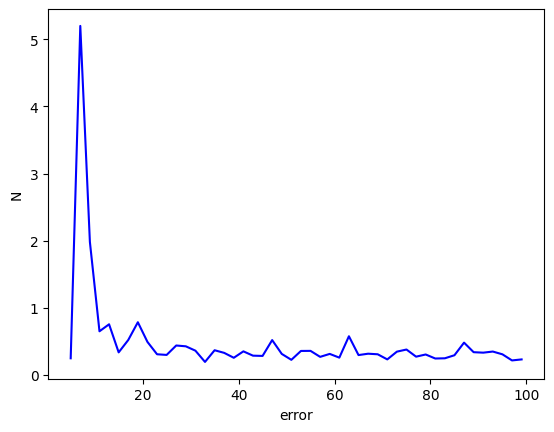

In [ ]:
import matplotlib.pyplot as plt
def get_current_error(y_pred,y): #to calculate mean square error
  return np.square(np.subtract(y,y_pred)).mean()

error=[]

for j in range(5,100,2):

  matrix,h,y,beta=Data_set(j,0.5,5)
  y_pred,beta_pred,cost=linear_regression(h,y,ler,iter,threshold)
  error=np.append(error,get_current_error(y_pred,y)) #append errors in an array

print(error)

plot = plt.figure('dependence')
plt.xlabel('error')
plt.ylabel('N')
plt.plot(range(5,100,2),error, color='b') #plot n vs error graph
plot.show()

# PART B(CHANGING SIGMA)

 smaller σ implies less variability in the errors. This can lead to more precise estimates of the linear_linear_regression coefficients (
β).

Smaller standard deviations make it easier to distinguish the true underlying relationships between the independent and dependent variables from random noise.


The standard errors of the linear_linear_regression coefficients are directly related to σ. Smaller σ results in smaller standard errors, which leads to narrower confidence intervals for the coefficients.

[0.14758355 0.12050187 0.23478947 0.52523219 0.78241451]


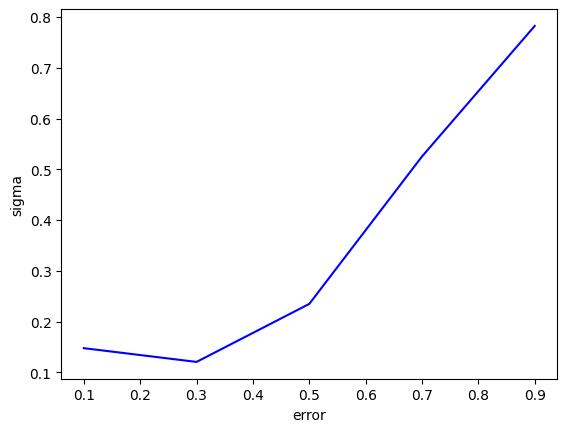

In [ ]:
import matplotlib.pyplot as plt
def get_current_error(y_pred,y):   # function to find mean square error
  return np.square(np.subtract(y,y_pred)).mean()

error=[]
i=0.1
while(i<1.0): #iterate over diffrent values of sigma

  matrix,h,y,beta=Data_set(70,i,5)
  y_pred,beta_pred,cost=linear_regression(h,y,ler,iter,threshold)
  error=np.append(error,get_current_error(y_pred,y)) #append values of errors in an array for various sigma
  i=i+0.2

print(error)
value = np.arange(0.1,1.0,0.2)
plot = plt.figure('dependence')
plt.xlabel('error')
plt.ylabel('sigma')
plt.plot(value,error, color='b') #lot the error vs sigma graph
plot.show()